In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

plt.style.use('Solarize_Light2')

%matplotlib inline

In [2]:
data = pd.read_csv('C:/Users/Александр/pj/pet_projects/E-commerce/data.csv', encoding = 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
data = data.dropna()
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [5]:
uniq_id = data.groupby('CustomerID', as_index=False) \
              .agg({'Country': 'count'}) \
              .query('Country > 10').shape[0]
uniq_id

3707

In [6]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [7]:
data['day_of_the_week'] = data['InvoiceDate'].dt.day_name()
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_the_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday


In [8]:
days = data.groupby('day_of_the_week', as_index=False).agg({'Country':'count'})
days.head()

,day_of_the_week,Country
0,Friday,56127
1,Monday,66382
2,Sunday,63237
3,Thursday,82374
4,Tuesday,68110


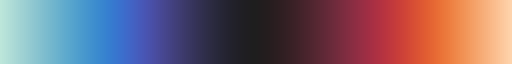

In [9]:
sns.color_palette("icefire", as_cmap=True)

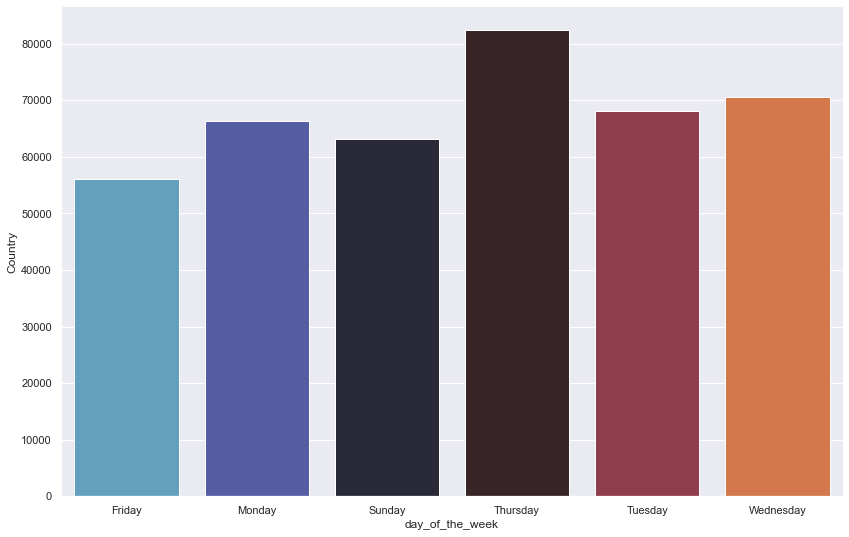

In [10]:
sns.set(rc={'figure.figsize':(14, 9)})
sns.barplot(data=days, x='day_of_the_week', y='Country', palette='icefire')
sns.despine()

In [11]:
most_popular_day = data.groupby(['StockCode', 'day_of_the_week']) \
                       .agg({'UnitPrice': 'count'}) \
                       .reset_index()

most_popular_day.pivot(index='StockCode', columns='day_of_the_week', values='UnitPrice') \
                .idxmax(axis=1) \
                .to_frame() \
                .reset_index() \
                .rename(columns={0:'most_popular_day'})

,StockCode,most_popular_day
0,10002,Thursday
1,10080,Monday
2,10120,Friday
3,10123C,Friday
4,10124A,Sunday
...,...,...
3679,D,Thursday
3680,DOT,Monday
3681,M,Monday
3682,PADS,Sunday


In [12]:
avg_buys_orders = data.groupby(['InvoiceDate', 'CustomerID'], as_index=False) \
                          .agg({'Country': 'count'}) \
                          .rename(columns={'Country': 'orders_by_month'})
avg_buys_orders.head()

,InvoiceDate,CustomerID,orders_by_month
0,2010-12-01 08:26:00,17850.0,7
1,2010-12-01 08:28:00,17850.0,2
2,2010-12-01 08:34:00,13047.0,16
3,2010-12-01 08:35:00,13047.0,1
4,2010-12-01 08:45:00,12583.0,20


In [18]:
avg_buys_orders['CustomerID'] = avg_buys_orders.CustomerID.apply(lambda x: int(x))
avg_buys_orders.head()

,InvoiceDate,CustomerID,orders_by_month
0,2010-12-01 08:26:00,17850,7
1,2010-12-01 08:28:00,17850,2
2,2010-12-01 08:34:00,13047,16
3,2010-12-01 08:35:00,13047,1
4,2010-12-01 08:45:00,12583,20


In [20]:
avg_buys_orders['weeks'] = (avg_buys_orders['InvoiceDate'].dt.daysinmonth) / 7
avg_buys_orders.head()

,InvoiceDate,CustomerID,orders_by_month,weeks
0,2010-12-01 08:26:00,17850,7,4.428571
1,2010-12-01 08:28:00,17850,2,4.428571
2,2010-12-01 08:34:00,13047,16,4.428571
3,2010-12-01 08:35:00,13047,1,4.428571
4,2010-12-01 08:45:00,12583,20,4.428571


In [21]:
avg_buys_orders['orders_by_week'] = avg_buys_orders.orders_by_month / avg_buys_orders.weeks
avg_buys_orders.head()

,InvoiceDate,CustomerID,orders_by_month,weeks,orders_by_week
0,2010-12-01 08:26:00,17850,7,4.428571,1.580645
1,2010-12-01 08:28:00,17850,2,4.428571,0.451613
2,2010-12-01 08:34:00,13047,16,4.428571,3.612903
3,2010-12-01 08:35:00,13047,1,4.428571,0.225806
4,2010-12-01 08:45:00,12583,20,4.428571,4.516129


In [22]:
buys_week = avg_buys_orders[['CustomerID', 'orders_by_week']]
buys_week.head()

,CustomerID,orders_by_week
0,17850,1.580645
1,17850,0.451613
2,13047,3.612903
3,13047,0.225806
4,12583,4.516129


## Напишем функцию на python, позволяющую строить когортный анализ. В период с января по декабрь попробуем выявить когорту с самым высоким retention на 3-й месяц.

Для начала возьмем исходные данные по клиентам и заказам и формируем из них новый датафрейм для задания. Затем добавляем колонку с датой заказа в формате `'Год-месяц'`.

In [40]:
cohorts['CustomerID'] = data.CustomerID.apply(lambda x: int(x))
cohorts = data[['CustomerID', 'InvoiceDate']]
cohorts['order_month'] = cohorts.InvoiceDate.apply(lambda x: x.strftime('%Y-%m'))
cohorts.head()

,CustomerID,InvoiceDate,order_month
0,17850,2010-12-01 08:26:00,2010-12
1,17850,2010-12-01 08:26:00,2010-12
2,17850,2010-12-01 08:26:00,2010-12
3,17850,2010-12-01 08:26:00,2010-12
4,17850,2010-12-01 08:26:00,2010-12


In [41]:
cohorts.set_index('CustomerID', inplace=True)
cohorts['join_month'] = cohorts.groupby(level=0)['InvoiceDate'].min().apply(lambda x: x.strftime('%Y-%m'))
cohorts.reset_index(inplace=True)
cohorts.insert(len(cohorts.columns), 'orders_num', 0, allow_duplicates=False)
cohorts.head()

,CustomerID,InvoiceDate,order_month,join_month,orders_num
0,17850,2010-12-01 08:26:00,2010-12,2010-12,0
1,17850,2010-12-01 08:26:00,2010-12,2010-12,0
2,17850,2010-12-01 08:26:00,2010-12,2010-12,0
3,17850,2010-12-01 08:26:00,2010-12,2010-12,0
4,17850,2010-12-01 08:26:00,2010-12,2010-12,0


In [42]:
cohorts_1 = cohorts.groupby(['join_month', 'order_month']) \
                   .agg({'CustomerID': pd.Series.nunique, 'orders_num': pd.Series.count}) \
                   .rename(columns={'CustomerID': 'total_customers'})
cohorts_1.head()

total_customers  orders_num
join_month order_month                             
2010-12    2010-12                  948       26850
           2011-01                  362       10881
           2011-02                  317        9183
           2011-03                  367       12111
           2011-04                  341       10092

In [43]:
def CohortPeriod(C):
    C['cohort_period'] = np.arange(len(C)) + 0
    return C
cohorts_1 = cohorts_1.groupby(level=0).apply(CohortPeriod)
cohorts_1.head()

total_customers  orders_num  cohort_period
join_month order_month                                            
2010-12    2010-12                  948       26850              0
           2011-01                  362       10881              1
           2011-02                  317        9183              2
           2011-03                  367       12111              3
           2011-04                  341       10092              4

In [44]:
cohorts_1.reset_index(inplace=True)
cohorts_1.set_index(['cohort_period', 'join_month'], inplace=True)
cohorts_1.head()

,,order_month,total_customers,orders_num
cohort_period,join_month,,,
0,2010-12,2010-12,948,26850
1,2010-12,2011-01,362,10881
2,2010-12,2011-02,317,9183
3,2010-12,2011-03,367,12111
4,2010-12,2011-04,341,10092


In [46]:
cohort_group_size = cohorts_1['total_customers'].groupby(level=1).first()
cohorts_1['total_customers'].unstack(0)

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12
join_month,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,NaN,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,NaN,NaN,97.0,107.0,98.0,NaN,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,NaN,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,NaN,62.0,71.0,69.0,NaN,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,NaN,48.0,NaN,60.0,NaN,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,NaN,NaN,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
retention_rate = cohorts_1['total_customers'].unstack(0).divide(cohort_group_size, axis=0)
retention_rate

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12
join_month,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,NaN,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,NaN,NaN,0.255263,0.281579,0.257895,NaN,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,NaN,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,NaN,0.207358,0.237458,0.230769,NaN,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,NaN,0.172043,NaN,0.215054,NaN,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,NaN,NaN,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,NaN,NaN,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
cohort_analysis = (retention_rate
            .style
            .set_caption('User retention by cohort') 
            .background_gradient(cmap='icefire')
            .highlight_null('white') 
            .format("{:.2%}", na_rep=""))
cohort_analysis

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12
join_month,,,,,,,,,,,,,
2010-12,100.00%,38.19%,33.44%,38.71%,35.97%,39.66%,37.97%,35.44%,,39.45%,37.34%,50.00%,27.43%
2011-01,100.00%,23.99%,28.27%,24.23%,32.78%,29.93%,26.13%,25.65%,31.12%,34.68%,36.82%,14.96%,
2011-02,100.00%,24.74%,19.21%,27.89%,,,25.53%,28.16%,25.79%,,9.21%,,
2011-03,100.00%,19.09%,25.45%,21.82%,,17.73%,26.36%,23.86%,28.86%,8.86%,,,
2011-04,100.00%,22.74%,22.07%,,20.74%,23.75%,23.08%,,8.36%,,,,
2011-05,100.00%,,17.20%,,21.51%,,26.52%,10.39%,,,,,
2011-06,100.00%,20.85%,18.72%,27.23%,24.68%,33.62%,10.21%,,,,,,
2011-07,100.00%,20.94%,,,27.23%,11.52%,,,,,,,
2011-08,100.00%,25.15%,,,13.77%,,,,,,,,


In [49]:
def C_A(cohorts, customer_unique_id, order_purchase_timestamp):
    cohorts['order_month'] = cohorts.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m'))
    
    cohorts.set_index('customer_unique_id', inplace=True)
    cohorts['join_month'] = cohorts.groupby(level=0)['order_purchase_timestamp'].min().apply(lambda x: x.strftime('%Y-%m'))
    cohorts.reset_index(inplace=True)
    cohorts.insert(len(cohorts.columns), 'orders_num', 0, allow_duplicates=False)
    
    cohorts_1 = cohorts_1.groupby(['join_month', 'order_month']) \
                         .agg({'customer_unique_id': pd.Series.nunique, 'orders_num': pd.Series.count}) \
                         .rename(columns={'customer_unique_id': 'total_customers'})
    
    def CohortPeriod(Coh):
        Coh['cohort_period'] = np.arange(len(C)) + 0
        return Coh
    cohorts_1 = cohorts_1.groupby(level=0).apply(CohortPeriod)
    
    cohorts_1.reset_index(inplace=True)
    cohorts_1.set_index(['cohort_period', 'join_month'], inplace=True)
    cohort_group_size = cohorts_1['total_customers'].groupby(level=1).first()
    retention_rate = cohorts_1['total_customers'].unstack(0).divide(cohort_group_size, axis=0)
    
    return retention_rate 

## Построим RFM-кластеры для пользователей. Выведем для каждого кластера средние значения метрик R, F, M.

In [51]:
date_max = max(data.InvoiceDate) + timedelta(days=1)

In [54]:
recency = data.groupby('CustomerID') \
              .agg({'InvoiceDate': lambda x: (date_max - x.max()).days}) \
              .reset_index() \
              .rename(columns={'InvoiceDate': 'recency'})
recency['recency'] = recency['recency'].astype('int16')

In [55]:
frequency = data.groupby('CustomerID', as_index=False) \
                .agg({'InvoiceDate': 'count'}) \
                .rename(columns={'InvoiceDate': 'frequency'})

In [57]:
monetary = data.groupby('CustomerID', as_index=False) \
                      .agg({'UnitPrice': 'sum'}) \
                      .rename(columns={'UnitPrice': 'monetary'})

In [58]:
rfm = recency.merge(frequency, on='CustomerID').merge(monetary) \
             .rename(columns={'order_purchase_timestamp_x': 'recency', 'order_purchase_timestamp_y': 'frequency'})
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346,326,2,2.08
1,12347,2,182,481.21
2,12348,75,31,178.71
3,12349,19,73,605.10
4,12350,310,17,65.30


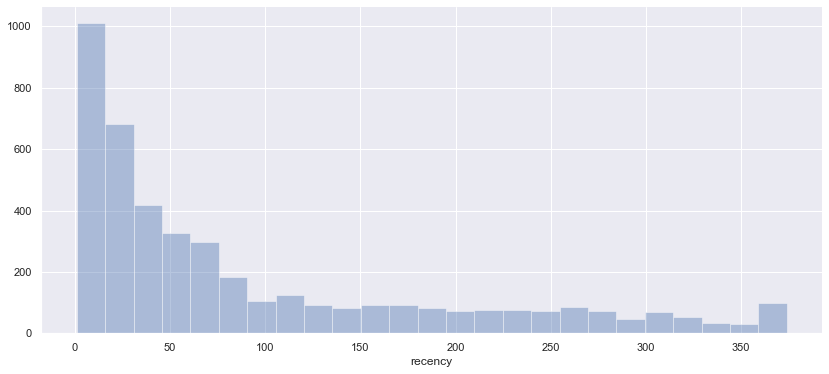

In [59]:
sns.set(rc={'figure.figsize':(14, 6)})
sns.distplot(rfm.recency, kde=False)
sns.despine()

In [60]:
print(rfm.recency.quantile(q=0.33))
print(rfm.recency.quantile(q=0.66))

24.0
87.0


In [61]:
def R(recency):
    if recency <= 90:
        return 3
    elif recency > 292:
        return 1
    else:
        return 2

rfm['r'] = rfm.recency.apply(R)

In [62]:
print(rfm.frequency.value_counts().to_list()[0] / sum(rfm.frequency.value_counts().to_list()[:]))

0.018069533394327538


In [63]:
def F(frequency):
    if frequency == 1:
        return 1
    elif frequency == 2:
        return 2
    else:
        return 3

rfm['f'] = rfm.frequency.apply(F)

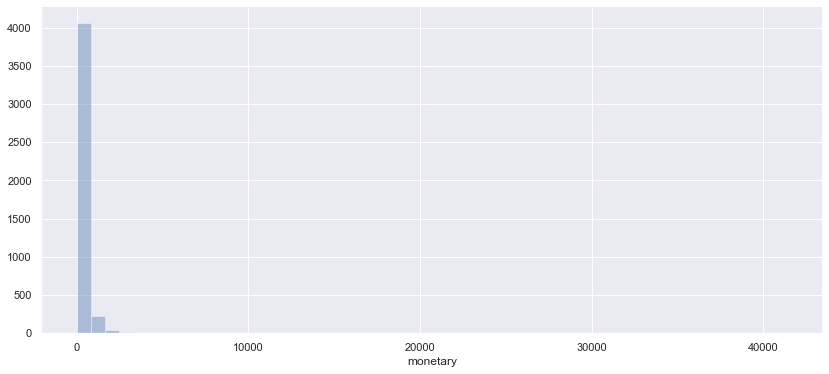

In [64]:
sns.distplot(rfm.monetary, kde=False)
sns.despine()

In [65]:
rfm.monetary.describe()

count     4372.000000
mean       322.008226
std       1284.783098
min          0.000000
25%         52.865000
50%        130.095000
75%        302.332500
max      41376.330000
Name: monetary, dtype: float64

In [66]:
def M(monetary):
    if monetary <= 100:
        return 1
    elif monetary > 1000:
        return 3
    else:
        return 2

rfm['m'] = rfm.monetary.apply(M)

In [67]:
rfm['RFM'] = rfm['r'].astype(str) + rfm['f'].astype(str) + rfm['m'].astype(str)
rfm.head()

,CustomerID,recency,frequency,monetary,r,f,m,RFM
0,12346,326,2,2.08,1,2,1,121
1,12347,2,182,481.21,3,3,2,332
2,12348,75,31,178.71,3,3,2,332
3,12349,19,73,605.10,3,3,2,332
4,12350,310,17,65.30,1,3,1,131


In [68]:
rfm_grouped = rfm.groupby('RFM').agg({'recency': 'mean', 'frequency': 'mean', 'monetary': 'mean'}).round(1)
rfm_grouped.value_counts().count()

23

In [70]:
rfm_graph = rfm.groupby('RFM', as_index=False) \
               .agg({'CustomerID': 'count'}) \
               .rename(columns={'CustomerID': 'num_of_customers'})
rfm_graph.head()

,RFM,num_of_customers
0,111,26
1,112,2
2,113,1
3,121,11
4,131,183


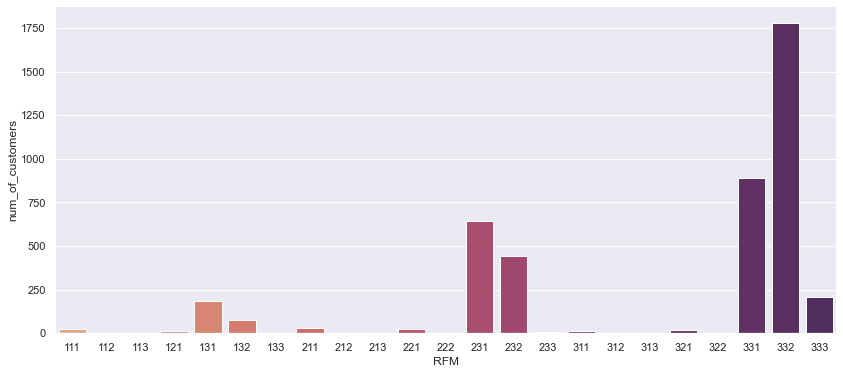

In [71]:
sns.barplot(data=rfm_graph, x='RFM', y='num_of_customers', palette="flare")
sns.despine()